## Below scripts checks "Mann-Whitney U test" to compare the dependency load time when F-PKI was used and when it was not

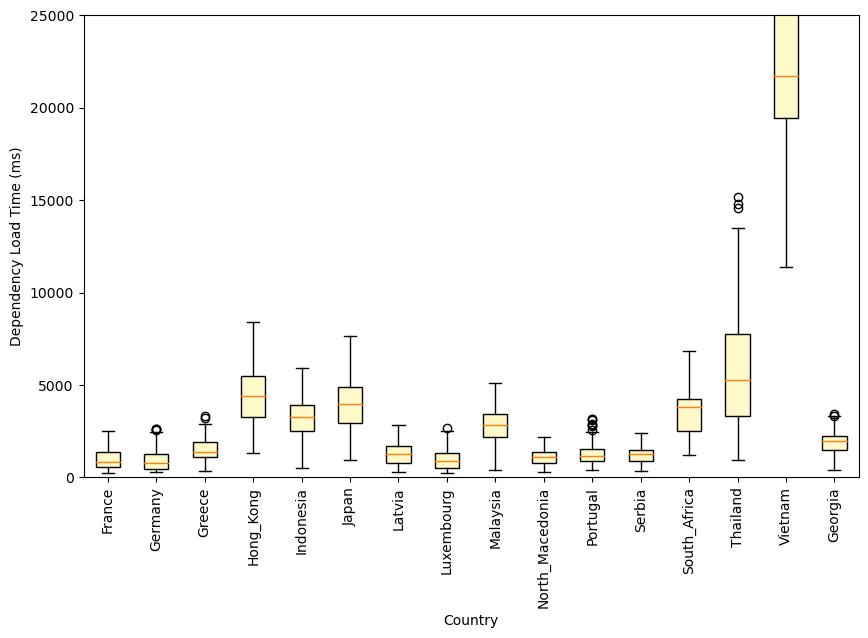

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

df1 = pd.read_csv('new_first_phase_mannwhitneyu_wasmrtt.csv')
df2 = pd.read_csv('new_third_phase_mannwhitneyu.csv')

country_column = 'Country'
load_time_column = 'Dependency Load Time'
wasm_rtt_column = 'WASM RTT'

df1 = df1[df1[wasm_rtt_column] != 'Waiting time exceeds 10 seconds']

significant_countries = []
load_time_data = []
unique_countries = df1[country_column].unique()


for country in unique_countries:
    load_time1 = df1.loc[df1[country_column] == country, load_time_column]
    load_time2 = df2.loc[df2[country_column] == country, load_time_column]
    load_time1 = load_time1.dropna()
    load_time2 = load_time2.dropna()

    q1 = load_time1.quantile(0.25)
    q3 = load_time1.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    load_time1 = load_time1[(load_time1 >= lower_bound) & (load_time1 <= upper_bound)]

    q1 = load_time2.quantile(0.25)
    q3 = load_time2.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    load_time2 = load_time2[(load_time2 >= lower_bound) & (load_time2 <= upper_bound)]

    stat, p_value = mannwhitneyu(load_time1, load_time2)

    if p_value < 0.05:
        significant_countries.append(country)
        load_time_data.append(load_time1)

data = pd.DataFrame({country_column: significant_countries, load_time_column: load_time_data})

plt.figure(figsize=(10, 6))
plt.boxplot(data[load_time_column].values,  patch_artist=True,boxprops = dict(facecolor = "#fff8c9"))
#plt.title('Box Plot of Dependency Load Time for Significant Countries (p < 0.05)')
plt.xlabel('Country')
plt.ylabel('Dependency Load Time (ms)')
plt.ylim(0, 25000)


xtick_labels = data[country_column].values
plt.xticks(ticks=np.arange(1, len(xtick_labels) + 1), labels=xtick_labels, rotation=90)
#plt.savefig("dependency.png", dpi=300, bbox_inches='tight') 
plt.show()


### This statistical tests results are based entirely on the sample data that we collected and analyzed when determining statistical significance or non-significance.